In [3]:
from sympy import *
from sympy.plotting import plot

x = Symbol("x", real=True)

f1 = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
f2 = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
f3 = (x ** 2 + 3) / (3 * (x + 1))
print(f"Исследование функций:\n{f1}\n{f2}\n{f3}")

Исследование функций:
-18*x**3 + 5*x**2 + 10*x - 30
2*x**3 + 2*x**2 - 18*x - 18
(x**2 + 3)/(3*x + 3)


In [4]:
# 1. Определить корни
#    Нули функции
def roots(f):
    return[round(x,3) for x in solve(f,x) if x.is_real] if [round(x,3) for x in solve(f,x) if x.is_real] else 'нет корней'
print(f'1 функция: {roots(f1)}')
print(f'2 функция: {roots(f2)}')
print(f'3 функция: {roots(f3)}')

1 функция: [-1.245]
2 функция: [-3, -1, 3]
3 функция: нет корней


In [5]:
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает
def extr(f):
    ex=[-oo, oo]
    ex[1:1]=solve(diff(f),x)
    ex.sort()
    return ex

def incrRedc(f):
    incr=[]
    redc=[]
    for i in range(1,len(extr(f))):
        temp=is_increasing(f,Interval.open(extr(f)[i-1],extr(f)[i]))
        if temp:
            incr.append(f'от {round(extr(f)[i-1],3)} до {round(extr(f)[i],3)}')
        else:
            redc.append(f'от {round(extr(f)[i-1],3)} до {round(extr(f)[i],3)}')
    print(f'Функция: {f}')
    print("Возрастает на интервале: ", *incr, sep='\n')
    print("Убывает на интервале: ", *redc, sep='\n')
    print('-'*20)
incrRedc(f1)
incrRedc(f2)

Функция: -18*x**3 + 5*x**2 + 10*x - 30
Возрастает на интервале: 
от -0.348 до 0.533
Убывает на интервале: 
от -oo до -0.348
от 0.533 до oo
--------------------
Функция: 2*x**3 + 2*x**2 - 18*x - 18
Возрастает на интервале: 
от -oo до -2.097
от 1.431 до oo
Убывает на интервале: 
от -2.097 до 1.431
--------------------


In [6]:
def extr(f):
    ex=[-oo, oo]
    ex[1:1]=solve(diff(f),x) # крит точки
    ex[1:1]=solve((3 * (x + 1)),x) # асимптота
    ex.sort()
    return ex

def incrRedc(f):
    incr=[]
    redc=[]
    for i in range(1,len(extr(f))):
        temp=is_increasing(f,Interval.open(extr(f)[i-1],extr(f)[i]))
        if temp:
            incr.append(f'от {round(extr(f)[i-1],3)} до {round(extr(f)[i],3)}')
        else:
            redc.append(f'от {round(extr(f)[i-1],3)} до {round(extr(f)[i],3)}')
    print(f'Функция: {f}')
    print("Возрастает на интервале: ", *incr, sep='\n')
    print("Убывает на интервале: ", *redc, sep='\n')
    print('-'*20)
incrRedc(f3)

Функция: (x**2 + 3)/(3*x + 3)
Возрастает на интервале: 
от -oo до -3
от 1 до oo
Убывает на интервале: 
от -3 до -1
от -1 до 1
--------------------


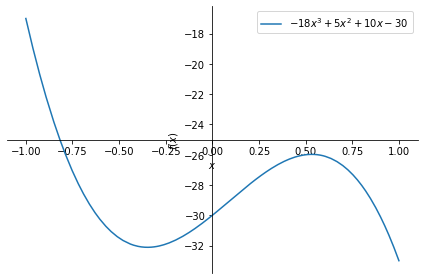

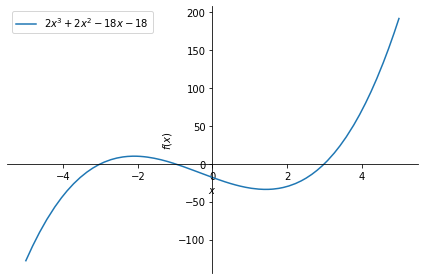

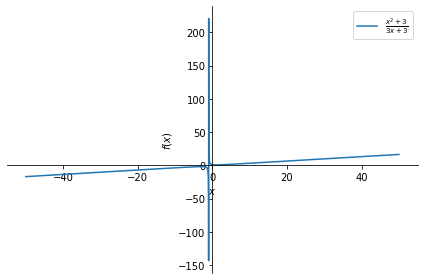

In [7]:
# 4. Построить график
plot(f1,(x,-1,1),legend=True)
plot(f2,(x,-5,5),legend=True)
plot(f3,(x,-50,50),legend=True)

In [8]:
# 5. Вычислить вершину
#    Экстремумы функции
def minMax(f):
    print(f"{'-'*20}\n Функция {f}")
    ex=solve(diff(f),x)
    for i in ex:
        temp=f.subs(x,i)
        if temp<0:
            print("Точка минимумуа", round(temp,3))
        else:
            print("Точка максимума", round(temp,3))
            
minMax(f1)
minMax(f2)
minMax(f3)

--------------------
 Функция -18*x**3 + 5*x**2 + 10*x - 30
Точка минимумуа -32.116
Точка минимумуа -25.975
--------------------
 Функция 2*x**3 + 2*x**2 - 18*x - 18
Точка минимумуа -33.802
Точка максимума 10.098
--------------------
 Функция (x**2 + 3)/(3*x + 3)
Точка минимумуа -2
Точка максимума 0.667


In [9]:
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0
#    Знакопостоянства функции
def aboveBelow(f): # для функция с корнями
    lst=[-oo, oo]
    lst[1:1]=[round(x,3) for x in solve(f,x) if x.is_real]
    ab=[]
    bel=[]
    counter = is_increasing(f,Interval.open(lst[0],lst[1]))
    for i in range(1,len(lst)):
        if counter%2:
            bel.append(f'{lst[i-1]},{lst[i]}')
        else:
            ab.append(f'{lst[i-1]},{lst[i]}')
        counter+=1
    print(f"Функция {f}")
    print("f > 0: ", *ab,sep='\n')
    print("f < 0: ", *bel,sep='\n')
    print('-'*20)

    
aboveBelow(f1)
aboveBelow(f2)

Функция -18*x**3 + 5*x**2 + 10*x - 30
f > 0: 
-oo,-1.245
f < 0: 
-1.245,oo
--------------------
Функция 2*x**3 + 2*x**2 - 18*x - 18
f > 0: 
-3,-1
3,oo
f < 0: 
-oo,-3
-1,3
--------------------


In [10]:
def aboveBelow(f):
    lst=[-oo, oo]
    lst[1:1]=solve((3 * (x + 1)),x) # асимптота
    ab=[]
    bel=[]
    for i in range(1,len(lst)):
        temp_1,temp_2=lst[i-1],lst[i]
        temp=is_increasing(f,Interval.open(temp_1,temp_2))
        if temp:
            bel.append(f'{temp_1},{lst[i]}')
        else:
            ab.append(f'{temp_1},{lst[i]}')
    print(f"Функция {f}")
    print("f < 0: ", *ab,sep='\n')
    print("f > 0: ", *bel,sep='\n')

aboveBelow(f3)

Функция (x**2 + 3)/(3*x + 3)
f < 0: 
-oo,-1
-1,oo
f > 0: 
